## **Tiled Shot Maps**

_Serie A 2021/22 - GameWeeks 1-7_

In [89]:
# imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
import matplotlib.gridspec as gridspec

from mplsoccer import VerticalPitch

from PIL import Image
import urllib
import os

**Data Preparation**

In [90]:
df_raw = pd.read_csv('../data/raw/07-serieA.csv', encoding='ISO-8859-1')
df_raw.head()

,Unnamed: 0,match_id,match_round,league_id,league_name,league_round_name,parent_league_id,parent_league_season,match_time_utc,home_team_id,...,shot_type,situation,period,is_own_goal,on_goal_shot_x,on_goal_shot_y,on_goal_shot_zoom_ratio,first_name,last_name,team_color
0,1,3919071,1,55,Serie A,Serie A Round 1,55,2022/2023,"Sat, Aug 13, 2022, 16:30 UTC",8564,...,Header,FromCorner,FirstHalf,False,0.939484,0.054358,1.000000,Rodrigo,Becao,#907850
1,2,3919071,1,55,Serie A,Serie A Round 1,55,2022/2023,"Sat, Aug 13, 2022, 16:30 UTC",8564,...,RightFoot,RegularPlay,FirstHalf,False,0.919312,0.107018,1.000000,Brahim,Diaz,#302028
2,3,3919071,1,55,Serie A,Serie A Round 1,55,2022/2023,"Sat, Aug 13, 2022, 16:30 UTC",8564,...,LeftFoot,Penalty,FirstHalf,False,0.354497,0.300668,1.000000,Theo,Hernández,#302028
3,4,3919071,1,55,Serie A,Serie A Round 1,55,2022/2023,"Sat, Aug 13, 2022, 16:30 UTC",8564,...,RightFoot,RegularPlay,FirstHalf,False,0.919312,0.086633,1.000000,Ante,Rebic,#302028
4,5,3919071,1,55,Serie A,Serie A Round 1,55,2022/2023,"Sat, Aug 13, 2022, 16:30 UTC",8564,...,LeftFoot,RegularPlay,FirstHalf,False,0.721637,0.677249,0.353834,Rafael,Leao,#302028


In [91]:
df_raw.columns

Index(['Unnamed: 0', 'match_id', 'match_round', 'league_id', 'league_name',
       'league_round_name', 'parent_league_id', 'parent_league_season',
       'match_time_utc', 'home_team_id', 'home_team', 'home_team_color',
       'away_team_id', 'away_team', 'away_team_color', 'id', 'event_type',
       'team_id', 'player_id', 'player_name', 'x', 'y', 'min', 'min_added',
       'is_blocked', 'is_on_target', 'blocked_x', 'blocked_y',
       'goal_crossed_y', 'goal_crossed_z', 'expected_goals',
       'expected_goals_on_target', 'shot_type', 'situation', 'period',
       'is_own_goal', 'on_goal_shot_x', 'on_goal_shot_y',
       'on_goal_shot_zoom_ratio', 'first_name', 'last_name', 'team_color'],
      dtype='object')

In [92]:
# keep only relevant columns
df_raw = df_raw[['team_id', 'player_id', 'player_name', 'min', 'expected_goals', 'event_type', 'team_color', 'match_id', 'is_own_goal', 'x', 'y', 'shot_type', 'situation']]

In [93]:
df_raw.head()

,team_id,player_id,player_name,min,expected_goals,event_type,team_color,match_id,is_own_goal,x,y,shot_type,situation
0,8600,844504,Rodrigo Becao,2,0.086003,Goal,#907850,3919071,False,102.344825,39.545001,Header,FromCorner
1,8564,750027,Brahim Diaz,7,0.054140,AttemptSaved,#302028,3919071,False,95.350879,19.304968,RightFoot,RegularPlay
2,8564,724371,Theo Hernández,11,0.788400,Goal,#302028,3919071,False,94.000000,34.000000,LeftFoot,Penalty
3,8564,265725,Ante Rebic,15,0.075055,Goal,#302028,3919071,False,94.000000,32.017501,RightFoot,RegularPlay
4,8564,848844,Rafael Leao,18,0.033549,Miss,#302028,3919071,False,78.768443,43.300128,LeftFoot,RegularPlay


In [94]:
teams_id = {8524: 'Atalanta', 9857: 'Bologna', 7801: 'Cremonese', 8534: 'Empoli', 8535: 'Fiorentina',
            8636: 'Inter', 9885: 'Juventus', 8543: 'Lazio', 9888: 'Lecce', 8564: 'Milan',
            6504: 'Monza', 9875: 'Napoli', 8686: 'Roma', 6480: 'Salernitana', 9882: 'Sampdoria',
            7943: 'Sassuolo', 9881: 'Spezia', 9804: 'Torino', 8600: 'Udinese', 9876: 'Hellas Verona'}

In [95]:
df_raw['team_name'] = df_raw['team_id'] 
df_raw.head()

,team_id,player_id,player_name,min,expected_goals,event_type,team_color,match_id,is_own_goal,x,y,shot_type,situation,team_name
0,8600,844504,Rodrigo Becao,2,0.086003,Goal,#907850,3919071,False,102.344825,39.545001,Header,FromCorner,8600
1,8564,750027,Brahim Diaz,7,0.054140,AttemptSaved,#302028,3919071,False,95.350879,19.304968,RightFoot,RegularPlay,8564
2,8564,724371,Theo Hernández,11,0.788400,Goal,#302028,3919071,False,94.000000,34.000000,LeftFoot,Penalty,8564
3,8564,265725,Ante Rebic,15,0.075055,Goal,#302028,3919071,False,94.000000,32.017501,RightFoot,RegularPlay,8564
4,8564,848844,Rafael Leao,18,0.033549,Miss,#302028,3919071,False,78.768443,43.300128,LeftFoot,RegularPlay,8564


In [96]:
df_raw[['team_name']] = df_raw[['team_name']].replace(teams_id)
df_raw.head()

,team_id,player_id,player_name,min,expected_goals,event_type,team_color,match_id,is_own_goal,x,y,shot_type,situation,team_name
0,8600,844504,Rodrigo Becao,2,0.086003,Goal,#907850,3919071,False,102.344825,39.545001,Header,FromCorner,Udinese
1,8564,750027,Brahim Diaz,7,0.054140,AttemptSaved,#302028,3919071,False,95.350879,19.304968,RightFoot,RegularPlay,Milan
2,8564,724371,Theo Hernández,11,0.788400,Goal,#302028,3919071,False,94.000000,34.000000,LeftFoot,Penalty,Milan
3,8564,265725,Ante Rebic,15,0.075055,Goal,#302028,3919071,False,94.000000,32.017501,RightFoot,RegularPlay,Milan
4,8564,848844,Rafael Leao,18,0.033549,Miss,#302028,3919071,False,78.768443,43.300128,LeftFoot,RegularPlay,Milan


In [97]:
df_raw.to_csv('../data/07-SerieA-ok.csv')

**Data Modeling**

In [98]:
# read data
df = pd.read_csv('../data/07-SerieA-ok.csv', index_col=0)
df.head()

,team_id,player_id,player_name,min,expected_goals,event_type,team_color,match_id,is_own_goal,x,y,shot_type,situation,team_name
0,8600,844504,Rodrigo Becao,2,0.086003,Goal,#907850,3919071,False,102.344825,39.545001,Header,FromCorner,Udinese
1,8564,750027,Brahim Diaz,7,0.054140,AttemptSaved,#302028,3919071,False,95.350879,19.304968,RightFoot,RegularPlay,Milan
2,8564,724371,Theo Hernández,11,0.788400,Goal,#302028,3919071,False,94.000000,34.000000,LeftFoot,Penalty,Milan
3,8564,265725,Ante Rebic,15,0.075055,Goal,#302028,3919071,False,94.000000,32.017501,RightFoot,RegularPlay,Milan
4,8564,848844,Rafael Leao,18,0.033549,Miss,#302028,3919071,False,78.768443,43.300128,LeftFoot,RegularPlay,Milan


In [99]:
# shot locations (for bins)
pitch = VerticalPitch(pitch_type='uefa')
pitch.dim

FixedDims(pitch_width=68.0, pitch_length=105.0, goal_width=7.32, goal_length=2.0, six_yard_width=18.32, six_yard_length=5.5, penalty_area_width=40.32, penalty_area_length=16.5, circle_diameter=18.3, corner_diameter=2.0, arc=53.05, invert_y=False, origin_center=False, left=0.0, right=105.0, bottom=0.0, top=68.0, aspect=1.0, width=68.0, length=105.0, goal_bottom=30.34, goal_top=37.66, six_yard_left=5.5, six_yard_right=99.5, six_yard_bottom=24.84, six_yard_top=43.16, penalty_left=11.0, penalty_right=94.0, penalty_area_left=16.5, penalty_area_right=88.5, penalty_area_bottom=13.84, penalty_area_top=54.16, center_width=34.0, center_length=52.5, x_markings_sorted=array([  0. ,   5.5,  11. ,  16.5,  52.5,  88.5,  94. ,  99.5, 105. ]), y_markings_sorted=array([ 0.  , 13.84, 24.84, 30.34, 37.66, 43.16, 54.16, 68.  ]), pitch_extent=array([  0., 105.,   0.,  68.]), positional_x=array([  0. ,  16.5,  34.5,  52.5,  70.5,  88.5, 105. ]), positional_y=array([ 0.  , 13.84, 24.84, 43.16, 54.16, 68.  ]),

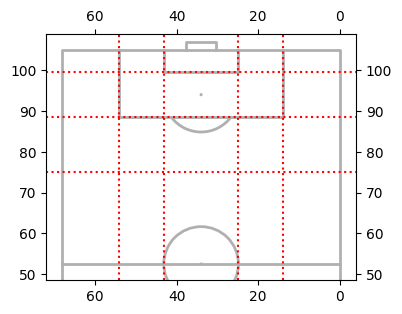

In [100]:
fig = plt.figure(figsize = (4,4), dpi = 100)
ax = plt.subplot(111)
pitch = VerticalPitch(
    pitch_type='uefa',
    half=True,
    axis=True, 
    label=True, 
    tick=True,
    goal_type='box'
)
pitch.draw(ax = ax)

ax.plot([13.84, 13.84], [ax.get_ylim()[0], ax.get_ylim()[1]], ls=':', color='red')
ax.plot([54.16, 54.16], [ax.get_ylim()[0], ax.get_ylim()[1]], ls=':', color='red')
ax.plot([24.84, 24.84], [ax.get_ylim()[0], ax.get_ylim()[1]], ls=':', color='red')
ax.plot([43.16, 43.16], [ax.get_ylim()[0], ax.get_ylim()[1]], ls=':', color='red')

ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [88.5,88.5], ls=':', color='red')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [99.5,99.5], ls=':', color='red')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [75,75], ls=':', color='red')

In [101]:
# function that returns the zone based on the following criteria
zone_areas = {
    'zone_1':{
        'x_lower_bound': 54.16, 'x_upper_bound': 68,
        'y_lower_bound': 88.5, 'y_upper_bound': 105,
    },
    'zone_2':{
        'x_lower_bound': 0, 'x_upper_bound': 13.84,
        'y_lower_bound': 88.5, 'y_upper_bound': 105,
    },
    'zone_3':{
        'x_lower_bound': 54.16, 'x_upper_bound': 68,
        'y_lower_bound': 20, 'y_upper_bound': 88.5,
    },
    'zone_4':{
        'x_lower_bound': 0, 'x_upper_bound': 13.84,
        'y_lower_bound': 20, 'y_upper_bound': 88.5,
    },
    'zone_5':{
        'x_lower_bound': 13.84, 'x_upper_bound': 24.84,
        'y_lower_bound': 88.5, 'y_upper_bound': 105,
    },
    'zone_6':{
        'x_lower_bound': 43.16, 'x_upper_bound': 54.16,
        'y_lower_bound': 88.5, 'y_upper_bound': 105,
    },
    'zone_7':{
        'x_lower_bound': 24.84, 'x_upper_bound': 43.16,
        'y_lower_bound': 88.5, 'y_upper_bound': 99.5,
    },
    'zone_8':{
        'x_lower_bound': 24.84, 'x_upper_bound': 43.16,
        'y_lower_bound': 99.5, 'y_upper_bound': 105,
    },
    'zone_9':{
        'x_lower_bound': 13.84, 'x_upper_bound': 24.84,
        'y_lower_bound': 75, 'y_upper_bound': 88.5,
    },
    'zone_10':{
        'x_lower_bound': 43.16, 'x_upper_bound': 54.16,
        'y_lower_bound': 75, 'y_upper_bound': 88.5,
    },
    'zone_11':{
        'x_lower_bound': 24.84, 'x_upper_bound': 43.16,
        'y_lower_bound': 75, 'y_upper_bound': 88.5,
    },
    'zone_12':{
        'x_lower_bound': 13.84, 'x_upper_bound': 54.16,
        'y_lower_bound': 20, 'y_upper_bound': 75,
    }
}

In [102]:
def assign_shot_zone(x,y):
    '''
    This function returns the zone based on the x & y coordinates of the shot
    taken.
    Args:
        - x (float): the x position of the shot based on a vertical grid.
        - y (float): the y position of the shot based on a vertical grid.
    '''

    global zone_areas

    # Conditions

    for zone in zone_areas:
        if (x >= zone_areas[zone]['x_lower_bound']) & (x <= zone_areas[zone]['x_upper_bound']):
            if (y >= zone_areas[zone]['y_lower_bound']) & (y <= zone_areas[zone]['y_upper_bound']):
                return zone

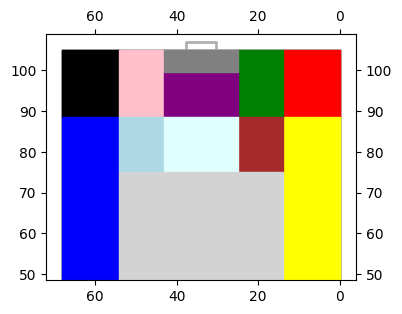

In [103]:
fig = plt.figure(figsize = (4,4), dpi = 100)
ax = plt.subplot(111)
pitch = VerticalPitch(
    pitch_type='uefa',
    half=True,
    axis=True, 
    label=True, 
    tick=True,
    goal_type='box'
)
pitch.draw(ax = ax)

zone_colors = {
    'zone_1': 'black',
    'zone_2': 'red',
    'zone_3': 'blue',
    'zone_4': 'yellow',
    'zone_5': 'green',
    'zone_6': 'pink',
    'zone_7': 'purple',
    'zone_8': 'grey',
    'zone_9': 'brown',
    'zone_10': 'lightblue',
    'zone_11': 'lightcyan',
    'zone_12': 'lightgrey'
}

for zone in zone_colors:
    x_lim = [zone_areas[zone]['x_lower_bound'], zone_areas[zone]['x_upper_bound']]
    y1 = zone_areas[zone]['y_lower_bound']
    y2 = zone_areas[zone]['y_upper_bound']
    ax.fill_between(x=x_lim, y1=y1, y2=y2, color=zone_colors[zone])

Now we can assign the zone to each shot of our df, but remember that first we need to invert the x and y values, since we are using a vertical pitch.

In [104]:
df.rename(columns={'x':'y', 'y':'x'}, inplace=True)
df = df[df['situation'] != 'Penalty'].reset_index(drop=True)

In [105]:
df['zone_area'] = [assign_shot_zone(x,y) for x,y in zip(df['x'], df['y'])]
df

,team_id,player_id,player_name,min,expected_goals,event_type,team_color,match_id,is_own_goal,y,x,shot_type,situation,team_name,zone_area
0,8600,844504,Rodrigo Becao,2,0.086003,Goal,#907850,3919071,False,102.344825,39.545001,Header,FromCorner,Udinese,zone_8
1,8564,750027,Brahim Diaz,7,0.054140,AttemptSaved,#302028,3919071,False,95.350879,19.304968,RightFoot,RegularPlay,Milan,zone_5
2,8564,265725,Ante Rebic,15,0.075055,Goal,#302028,3919071,False,94.000000,32.017501,RightFoot,RegularPlay,Milan,zone_7
3,8564,848844,Rafael Leao,18,0.033549,Miss,#302028,3919071,False,78.768443,43.300128,LeftFoot,RegularPlay,Milan,zone_10
4,8600,534484,Isaac Success,20,0.030647,Miss,#907850,3919071,False,98.535085,21.617071,RightFoot,ThrowInSetPiece,Udinese,zone_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,8564,1131217,Pierre Kalulu,86,0.195098,Post,#302028,3919457,False,98.631582,29.967858,RightFoot,RegularPlay,Milan,zone_7
1823,9875,773189,Tanguy Ndombélé,90,0.029205,AttemptSaved,#003880,3919457,False,81.246118,33.313749,LeftFoot,RegularPlay,Napoli,zone_11
1824,9875,612863,Andre-Frank Zambo Anguissa,90,0.030396,Miss,#003880,3919457,False,79.331550,30.492501,RightFoot,FromCorner,Napoli,zone_11
1825,8564,750027,Brahim Diaz,90,0.104993,AttemptSaved,#302028,3919457,False,98.631582,37.768000,Header,RegularPlay,Milan,zone_7


In [106]:
data = df.groupby(['team_id', 'team_name', 'team_color', 'zone_area']).apply(lambda x: x.shape[0]).reset_index()
data.rename(columns={0:'num_shots'}, inplace=True)

total_shots = data.groupby(['team_id'])['num_shots'].sum().reset_index()
total_shots.rename(columns={'num_shots':'total_shots'}, inplace=True)

data = pd.merge(data, total_shots, on='team_id', how='left')
data['pct_shots'] = data['num_shots']/data['total_shots']

In [107]:
data.head()

,team_id,team_name,team_color,zone_area,num_shots,total_shots,pct_shots
0,6480,Salernitana,#59181C,zone_10,3,92,0.032609
1,6480,Salernitana,#59181C,zone_11,25,92,0.271739
2,6480,Salernitana,#59181C,zone_12,3,92,0.032609
3,6480,Salernitana,#59181C,zone_5,6,92,0.065217
4,6480,Salernitana,#59181C,zone_6,4,92,0.043478


**Data Visualization**

In [108]:
def plot_shot_location(ax, fig, team_id, df=data):
    '''
    This functions plots the shot location grid for a team
    '''
    global zone_areas
    data = df.copy()

    pitch = VerticalPitch(
        pitch_type='uefa',
        half=True,
        goal_type='box',
        linewidth=1.25,
        line_color='black',
        spot_scale=0.0
    )
    pitch.draw(ax = ax)

    plot_df = data[data['team_id'] == team_id]
    max_value = plot_df['pct_shots'].max()
    team_name = plot_df['team_name'].iloc[0]
    team_color = plot_df['team_color'].iloc[0]
    team_id = plot_df['team_id'].iloc[0]
    total_shots = plot_df['total_shots'].iloc[0]

    # Grids
    ax.plot([13.84, 13.84], [40, 88.5], ls='--', color='black', lw=1)
    ax.plot([54.16, 54.16], [40, 88.5], ls='--', color='black', lw=1)
    ax.plot([24.84, 24.84], [99.5, 88.5], ls='--', color='black', lw=1)
    ax.plot([43.16, 43.16], [99.5, 88.5], ls='--', color='black', lw=1)

    ax.plot([68, 54.16], [88.5,88.5], ls='--', color='black', lw=1)
    ax.plot([0.5, 13.84], [88.5,88.5], ls='--', color='black', lw=1)
    ax.plot([13.84, 54.16], [75,75], ls='--', color='black', lw=1)

    for zone in plot_df['zone_area']:
        shot_pct = plot_df[plot_df['zone_area'] == zone]['pct_shots'].iloc[0]
        x_lim = [zone_areas[zone]['x_lower_bound'], zone_areas[zone]['x_upper_bound']]
        y1 = zone_areas[zone]['y_lower_bound']
        y2 = zone_areas[zone]['y_upper_bound']
        ax.fill_between(
            x=x_lim, 
            y1=y1, y2=y2, 
            color='#DA70D6', alpha=(shot_pct/max_value),
            zorder=0, ec='None')
        if shot_pct > 0.05:
            x_pos = x_lim[0] + abs(x_lim[0] - x_lim[1])/2
            if y1 == 20:
                y1 = 58
            y_pos = y1 + abs(y1 - y2)/2
            text_ = ax.annotate(
                xy=(x_pos, y_pos),
                text=f'{shot_pct:.0%}',
                ha='center',
                va='center',
                color='black',
                weight='bold',
                size=7
            )
            text_.set_path_effects(
                [path_effects.Stroke(linewidth=1.5, foreground='white'), path_effects.Normal()]
            )
    # -- Transformation functions
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
    ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1])
    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    # -- Take data coordinates and transform them to normalized figure coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    ax_coords = DC_to_NFC((11,62.5))
    ax_size = 0.021
    image_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_size, ax_size],
        fc='None', anchor='C'
    )
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png'))
    image_ax.imshow(club_icon)
    image_ax.axis('off')
    ax_text(
        x=67, y=120,
        s=f'{team_name} <| shots {total_shots:.0f}>',
        highlight_textprops=[{'size':8, 'weight':'normal'}],
        ax=ax,
        weight='bold',
        size=10
    )
    
    return ax

In [109]:
order_teams = total_shots.sort_values(by='total_shots', ascending=False)

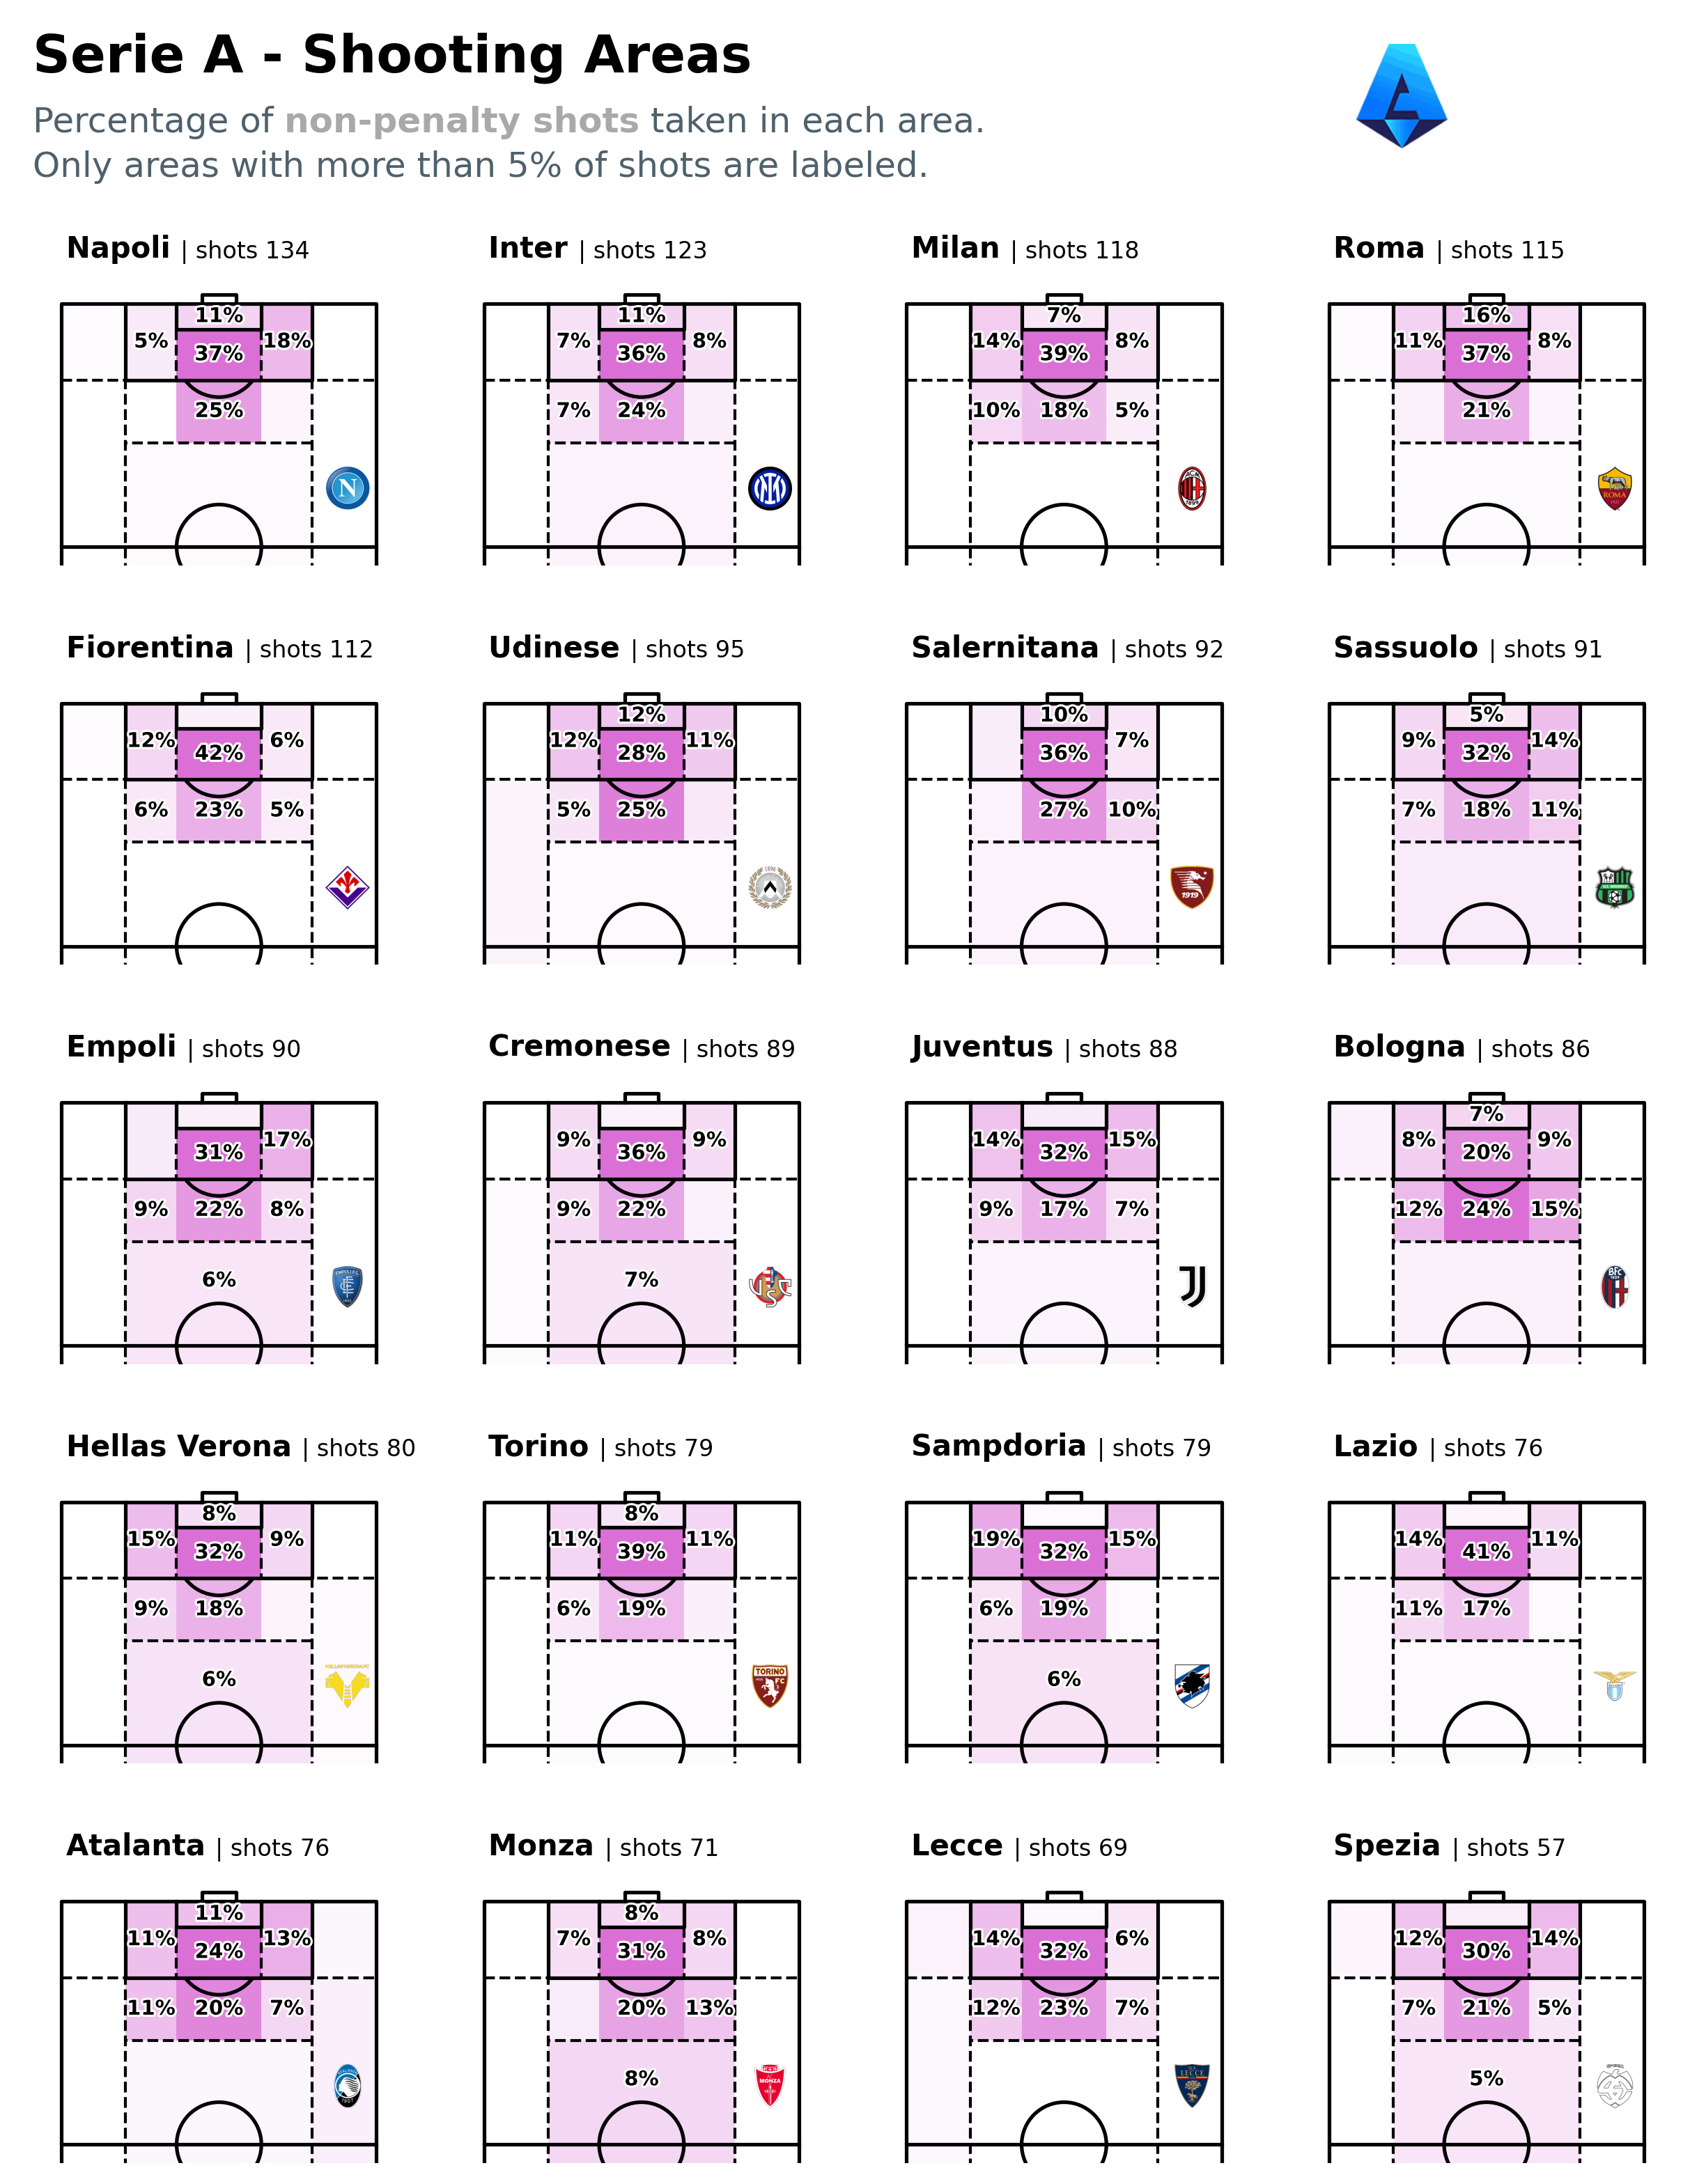

In [110]:
layout_ = '''
    ABCD
    EFGH
    IJKL
    MNOP
    QRST
'''

height_ratios = [1]*5

fig = plt.figure(figsize=(10,12), dpi=300)
axs = fig.subplot_mosaic(
    layout_, 
    gridspec_kw={
        'height_ratios':height_ratios,
    }
)

counter = 0
for k, ax in axs.items():
    team_id = order_teams['team_id'].iloc[counter]
    plot_shot_location(ax, fig, team_id=team_id)
    counter += 1

fig_text(
    x = 0.12, y = .95, 
    s = "Serie A - Shooting Areas",
    va = "bottom", ha = "left",
    fontsize = 18, color = "black", weight = "bold"
)
fig_text(
	x = 0.12, y = .91, 
    s = "Percentage of <non-penalty shots> taken in each area.\nOnly areas with more than 5% of shots are labeled.",
    highlight_textprops=[{"weight": "bold", "color": "darkgrey"}],
	va = "bottom", ha = "left",
	fontsize = 12, color = "#4E616C"
)

fotmob_url_league = "https://images.fotmob.com/image_resources/logo/leaguelogo/"

# league logo
logo_ax = fig.add_axes([0.75, .92, 0.05, 0.05], zorder=1)
league_icon = Image.open(urllib.request.urlopen(f"{fotmob_url_league}55.png"))
logo_ax.imshow(league_icon)
logo_ax.axis("off")

plt.savefig(
	"../figures/07_SerieA_shots.png",
	dpi = 300,
	facecolor = "white",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"../figures/07_SerieA_shots_tr.png",
	dpi = 300,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)